# 1. Loading the Yelp Dataset


In [24]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

In [26]:
# Load all the file paths 
business_file_path = '../../data/yelp_academic_dataset_business.json'
review_file_path = '../../data/yelp_academic_dataset_review.json'
user_file_path = '../../data/yelp_academic_dataset_user.json'

In [27]:
# Create a function to check if the file path exists
def check_file_path(file_path):
    try:
      with open(file_path) as f:
          print(f"File found: {file_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")

In [28]:
# Create a function to check all the file paths 
def check_all_file_paths():
    check_file_path(business_file_path)
    check_file_path(review_file_path)
    check_file_path(user_file_path)

In [29]:
check_all_file_paths()

File found: ../../data/yelp_academic_dataset_business.json
File found: ../../data/yelp_academic_dataset_review.json
File found: ../../data/yelp_academic_dataset_user.json


# Sample the Yelp Data

In [30]:
def sample_data(file_path, sample_size, chunk_size=1000, sample_per_chunk=1000, random_state=42):
    """
    Samples a specified number of rows from a large JSON file in chunks.
    
    Args:
        file_path (str): Path to the JSON file containing data.
        sample_size (int): Total number of rows to sample. Default is 150,000.
        chunk_size (int): Number of rows to read per chunk. Default is 1,000.
        sample_per_chunk (int): Number of rows to sample from each chunk. Default is 1,000.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        pd.DataFrame: DataFrame containing the sampled rows.
    """
    # Initialize an empty DataFrame to store the sampled data
    sampled_data = pd.DataFrame()

    # Create an iterator to read the file in chunks
    data_reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

    # Loop through the chunks
    for chunk in data_reader:
        # Randomly sample rows from the current chunk and append to the DataFrame
        sampled_data = pd.concat(
            [sampled_data, chunk.sample(n=sample_per_chunk, random_state=random_state)],
            ignore_index=True
        )

        # Stop once we have enough rows
        if len(sampled_data) >= sample_size:
            break

    # Truncate to exactly sample_size rows if overshot
    sampled_data = sampled_data.head(sample_size)
    return sampled_data

In [31]:
# Sample the data in various sizes
def generate_samples(file_path, name, sample_sizes):
    for sample_size in sample_sizes:
        sample_df = sample_data(file_path, sample_size)
        sample_df.to_csv(f'../../data/{name}_sample_{sample_size}.csv', index=False)

# Businesses Dataset

In [32]:
business_df = pd.read_json(business_file_path, lines=True)
business_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [33]:
# Create multiple samples of businesses
# Create sample of 100, 1K, 10K, 100K

sample_sizes = [10 ** i for i in range(2, 6)]
generate_samples(business_file_path, sample_sizes, 'business')

TypeError: '>=' not supported between instances of 'int' and 'str'

In [ ]:
# How to finish sampling the data


# Sample the Yelp Data

In [ ]:
def sample_data(file_path, sample_size, chunk_size=1000, sample_per_chunk=1000, random_state=42):
    """
    Samples a specified number of rows from a large JSON file in chunks.
    
    Args:
        file_path (str): Path to the JSON file containing data.
        sample_size (int): Total number of rows to sample. Default is 150,000.
        chunk_size (int): Number of rows to read per chunk. Default is 1,000.
        sample_per_chunk (int): Number of rows to sample from each chunk. Default is 1,000.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        pd.DataFrame: DataFrame containing the sampled rows.
    """
    # Initialize an empty DataFrame to store the sampled data
    sampled_data = pd.DataFrame()

    # Create an iterator to read the file in chunks
    data_reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

    # Loop through the chunks
    for chunk in data_reader:
        # Randomly sample rows from the current chunk and append to the DataFrame
        sampled_data = pd.concat(
            [sampled_data, chunk.sample(n=sample_per_chunk, random_state=random_state)],
            ignore_index=True
        )

        length = int(len(sampled_data))

        print(f"Sampled {length} rows so far...")
        print(f"Sample size is {sample_size}")

        # Stop once we have enough rows
        if length >= sample_size:
            break

    # Truncate to exactly sample_size rows if overshot
    sampled_data = sampled_data.head(sample_size)
    return sampled_data

In [ ]:
# # Find categories of businesses containing 'Doctors'
# doctors_business_df = business_df[business_df['categories'].str.contains('Doctors', na=False)]
# doctors_business_df


In [ ]:
# Export this to csv
business_df.to_csv('../data/business.csv', index=False)

# Users Dataset

In [ ]:
users_df = pd.read_csv("../../data/yelp_academic_dataset_user.csv")
users_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Export this to csv
# users_df.to_csv('../data/users.csv', index=False)

In [ ]:
sample_sizes = [10 ** i for i in range(2, 7)]
generate_samples(user_file_path, sample_sizes, 'users')

Sampled 1000 rows so far...
Sample size is u


TypeError: '>=' not supported between instances of 'int' and 'str'

In [ ]:
sample_sizes = [10 ** i for i in range(2, 7)]

for sample_size in sample_sizes:
    sample_df = sample_data(user_file_path, sample_size)
    sample_df.to_csv(f'../../data/users_sample_{sample_size}.csv', index=False)

Sampled 1000 rows so far...
Sample size is 100
Sampled 1000 rows so far...
Sample size is 1000
Sampled 1000 rows so far...
Sample size is 10000
Sampled 2000 rows so far...
Sample size is 10000
Sampled 3000 rows so far...
Sample size is 10000
Sampled 4000 rows so far...
Sample size is 10000
Sampled 5000 rows so far...
Sample size is 10000
Sampled 6000 rows so far...
Sample size is 10000
Sampled 7000 rows so far...
Sample size is 10000
Sampled 8000 rows so far...
Sample size is 10000
Sampled 9000 rows so far...
Sample size is 10000
Sampled 10000 rows so far...
Sample size is 10000
Sampled 1000 rows so far...
Sample size is 100000
Sampled 2000 rows so far...
Sample size is 100000
Sampled 3000 rows so far...
Sample size is 100000
Sampled 4000 rows so far...
Sample size is 100000
Sampled 5000 rows so far...
Sample size is 100000
Sampled 6000 rows so far...
Sample size is 100000
Sampled 7000 rows so far...
Sample size is 100000
Sampled 8000 rows so far...
Sample size is 100000
Sampled 9000 r

# Reviews Dataset

In [ ]:
sample_sizes = [10 ** i for i in range(2, 7)]

for sample_size in sample_sizes:
    sample_df = sample_data(review_file_path, sample_size)
    sample_df.to_csv(f'../../data/reviews_sample_{sample_size}.csv', index=False)

Sampled 1000 rows so far...
Sample size is 100
Sampled 1000 rows so far...
Sample size is 1000
Sampled 1000 rows so far...
Sample size is 10000
Sampled 2000 rows so far...
Sample size is 10000
Sampled 3000 rows so far...
Sample size is 10000
Sampled 4000 rows so far...
Sample size is 10000
Sampled 5000 rows so far...
Sample size is 10000
Sampled 6000 rows so far...
Sample size is 10000
Sampled 7000 rows so far...
Sample size is 10000
Sampled 8000 rows so far...
Sample size is 10000
Sampled 9000 rows so far...
Sample size is 10000
Sampled 10000 rows so far...
Sample size is 10000
Sampled 1000 rows so far...
Sample size is 100000
Sampled 2000 rows so far...
Sample size is 100000
Sampled 3000 rows so far...
Sample size is 100000
Sampled 4000 rows so far...
Sample size is 100000
Sampled 5000 rows so far...
Sample size is 100000
Sampled 6000 rows so far...
Sample size is 100000
Sampled 7000 rows so far...
Sample size is 100000
Sampled 8000 rows so far...
Sample size is 100000
Sampled 9000 r

In [ ]:
sample_size = 1000000

def sample_data(file_path, sample_size, chunk_size=1000, sample_per_chunk=1000, random_state=42):
    """
    Samples a specified number of rows from a large JSON file in chunks.
    
    Args:
        file_path (str): Path to the JSON file containing data.
        sample_size (int): Total number of rows to sample. Default is 150,000.
        chunk_size (int): Number of rows to read per chunk. Default is 1,000.
        sample_per_chunk (int): Number of rows to sample from each chunk. Default is 1,000.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        pd.DataFrame: DataFrame containing the sampled rows.
    """
    # Initialize an empty DataFrame to store the sampled data
    sampled_data = pd.DataFrame()

    # Create an iterator to read the file in chunks
    data_reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

    # Loop through the chunks
    for chunk in data_reader:
        # Randomly sample rows from the current chunk and append to the DataFrame
        sampled_data = pd.concat(
            [sampled_data, chunk.sample(n=sample_per_chunk, random_state=random_state)],
            ignore_index=True
        )

        # Stop once we have enough rows
        if len(sampled_data) >= sample_size:
            break

    # Truncate to exactly sample_size rows if overshot
    sampled_data = sampled_data.head(sample_size)
    return sampled_data

# Example usage
sampled_reviews = sample_data(review_file_path, sample_size=sample_size)
sampled_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,S8jdwyhSsz30eNegDFkObA,86WYiv6T14Fbf2x0yGP8jA,B91yBSPvAz5O_t9JFafN1Q,5,0,0,0,I absolutely love EVAN he's the best guy ever....,2016-05-31 04:46:41
1,nAx6LHi2qcvh1Rg9MaqckA,s_tmMM7ZV6LyRosVL0UyhA,jxfAi7UDmtbhyPw7ZsfKVw,3,0,0,0,The food is really good!! The service is less ...,2018-08-04 20:20:55
2,bd5QvdMJJYPWK535BMJp1w,na0A2eutW2NtTdu7xMk2uw,j8JOZvfeHEfUWq3gEz6ABQ,3,0,1,0,"Great hangout for wine, cheese, and some music...",2014-11-12 15:38:32
3,oQ2wM3ibdAnCMBmhfwAi9A,D7weAtcvX8_I_ULfyuy83w,C1D2o1VV2TDjpkG3BsdseA,4,0,0,0,This is my favourite place to get fish tacos! ...,2016-05-31 04:49:45
4,chtDBb_3unH0Wcs3W2Iahw,gSp5C3BfIVAHdH27rzoCDQ,RhuYqAT45uIR2NNdDsolXQ,5,1,0,1,Some of the finest Mexican food I've had. The ...,2017-07-18 18:47:24


In [ ]:
# Export the sampled data to a CSV file
sampled_reviews.to_csv('../../data/review_sampled_1000000.csv', index=False)

### Metric 1: Average Stars

In [ ]:
# Create a dataframe for the average stars per business
average_stars_sampled = sampled_reviews.groupby('business_id')['stars'].mean().reset_index()
average_stars_sampled

,business_id,stars
0,--ZVrH2X2QXBFdCilbirsw,4.722222
1,--_9CAxgfXZmoFdNIRrhHA,3.250000
2,--_lZuj_WCGnDG6n0emlRg,2.571429
3,--hF_3v1JmU9nlu4zfXJ8Q,4.733333
4,--sXnWH9Xm6_NvIjyuA99w,3.800000
...,...,...
27090,zziDpuuJw-Km1J4BaGpBKA,3.000000
27091,zzjFdJwXuxBOGe9JeY_EMw,4.104167
27092,zznJox6-nmXlGYNWgTDwQQ,2.307692
27093,zztOG2cKm87I6Iw_tleZsQ,4.833333


<AxesSubplot:>

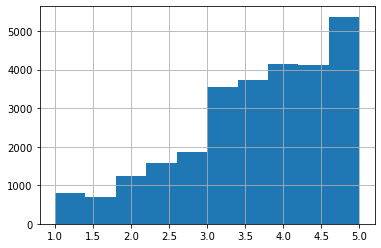

In [ ]:
# Create a histogram of the average stars
average_stars_sampled['stars'].hist()

In [ ]:
average_stars_sampled['stars'].describe()

count    27095.000000
mean         3.656561
std          1.009151
min          1.000000
25%          3.000000
50%          3.818182
75%          4.444444
max          5.000000
Name: stars, dtype: float64

### Metric 2: Review Lengths

In [ ]:
# Get the review description length
sampled_reviews['text_length'] = sampled_reviews['text'].apply(len)
sampled_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_length
0,S8jdwyhSsz30eNegDFkObA,86WYiv6T14Fbf2x0yGP8jA,B91yBSPvAz5O_t9JFafN1Q,5,0,0,0,I absolutely love EVAN he's the best guy ever....,2016-05-31 04:46:41,235
1,nAx6LHi2qcvh1Rg9MaqckA,s_tmMM7ZV6LyRosVL0UyhA,jxfAi7UDmtbhyPw7ZsfKVw,3,0,0,0,The food is really good!! The service is less ...,2018-08-04 20:20:55,592
2,bd5QvdMJJYPWK535BMJp1w,na0A2eutW2NtTdu7xMk2uw,j8JOZvfeHEfUWq3gEz6ABQ,3,0,1,0,"Great hangout for wine, cheese, and some music...",2014-11-12 15:38:32,218
3,oQ2wM3ibdAnCMBmhfwAi9A,D7weAtcvX8_I_ULfyuy83w,C1D2o1VV2TDjpkG3BsdseA,4,0,0,0,This is my favourite place to get fish tacos! ...,2016-05-31 04:49:45,509
4,chtDBb_3unH0Wcs3W2Iahw,gSp5C3BfIVAHdH27rzoCDQ,RhuYqAT45uIR2NNdDsolXQ,5,1,0,1,Some of the finest Mexican food I've had. The ...,2017-07-18 18:47:24,359


<AxesSubplot:>

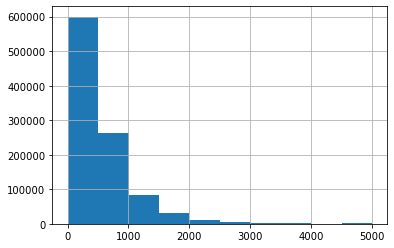

In [ ]:
# Create a histogram of the review description length
sampled_reviews['text_length'].hist()

In [ ]:
# Describe the review description length
sampled_reviews['text_length'].describe()

count    1000000.000000
mean         563.451724
std          520.728919
min            1.000000
25%          228.000000
50%          403.000000
75%          715.000000
max         5000.000000
Name: text_length, dtype: float64

### Metric 3: Counts for Useful, Cool, Funny Upvotes per Business

In [ ]:
# Get the counts of the useful, cool, and funny per business by grouping by business_id
business_counts_sampled = sampled_reviews.groupby('business_id')[['useful', 'cool', 'funny']].sum().reset_index()
business_counts_sampled

,business_id,useful,cool,funny
0,--ZVrH2X2QXBFdCilbirsw,48,35,22
1,--_9CAxgfXZmoFdNIRrhHA,14,3,3
2,--_lZuj_WCGnDG6n0emlRg,5,2,1
3,--hF_3v1JmU9nlu4zfXJ8Q,11,10,0
4,--sXnWH9Xm6_NvIjyuA99w,1,2,0
...,...,...,...,...
27090,zziDpuuJw-Km1J4BaGpBKA,0,1,0
27091,zzjFdJwXuxBOGe9JeY_EMw,54,20,15
27092,zznJox6-nmXlGYNWgTDwQQ,3,0,1
27093,zztOG2cKm87I6Iw_tleZsQ,1,2,0


In [ ]:
business_counts_sampled.describe()

,useful,cool,funny
count,27095.000000,27095.000000,27095.000000
mean,40.841262,16.871342,11.360472
std,105.508562,52.789151,35.014768
min,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000
50%,12.000000,3.000000,2.000000
75%,36.000000,12.000000,9.000000
max,4977.000000,1938.000000,1562.000000


### Metric 4: Counts of Reviews per Business

In [ ]:
# These are the counts associated with the businesses to show the distribution
sampled_reviews.groupby('business_id').count().sort_values('review_id', ascending=False)[['review_id']].head(10).rename(columns={'review_id': 'count'}) 

,count
business_id,
GBTPC53ZrG1ZBY3DT8Mbcw,4661
PY9GRfzr4nTZeINf346QOw,2715
SZU9c8V2GuREDN5KgyHFJw,2444
UCMSWPqzXjd7QHq7v8PJjQ,2230
vN6v8m4DO45Z4pp8yxxF_w,2120
W4ZEKkva9HpAdZG88juwyQ,2116
8uF-bhJFgT4Tn6DTb27viA,2110
pSmOH4a3HNNpYM82J5ycLA,2091
Zi-F-YvyVOK0k5QD7lrLOg,2008


In [ ]:
# Return the min max quartile counts for the count of reviews per business id
sampled_reviews_count_per_business = sampled_reviews.groupby('business_id').count().sort_values('review_id', ascending=False)[['review_id']].describe()
sampled_reviews_count_per_business

,review_id
count,27095.000000
mean,36.907178
std,98.996153
min,1.000000
25%,6.000000
50%,11.000000
75%,30.000000
max,4661.000000


In [ ]:
# Save the sampled reviews to a CSV file
sampled_reviews.to_csv(f'../data/review_sampled_{sample_size}.csv', index=False)

## Compare to the Original Review df

In [ ]:
# Read the original review_df from the reviews.csv file in data
review_df = pd.read_csv('../../data/reviews.csv')
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990278,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


### Metric 1: Average Stars - Overall df

In [ ]:
# Create a dataframe for the average stars per business
average_stars = review_df.groupby('business_id')['stars'].mean().reset_index()
average_stars

,business_id,stars
0,---kPU91CF4Lq2-WlRu9Lw,4.500000
1,--0iUa4sNDFiZFrAdIWhZQ,3.214286
2,--30_8IhuyMHbSOcNWd6DQ,3.555556
3,--7PUidqRWpRSpXebiyxTg,1.750000
4,--7jw19RH9JKXgFohspgQw,4.230769
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,4.916667
150342,zztOG2cKm87I6Iw_tleZsQ,4.833333
150343,zzu6_r3DxBJuXcjnOYVdTw,3.625000
150344,zzw66H6hVjXQEt0Js3Mo4A,3.600000


<AxesSubplot:>

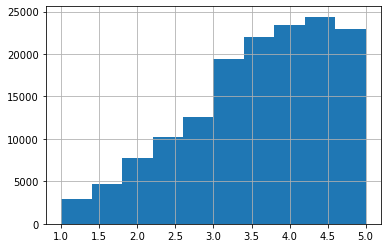

In [ ]:
average_stars['stars'].hist()

In [ ]:
average_stars['stars'].describe()

count    150346.000000
mean          3.587534
std           0.961807
min           1.000000
25%           2.948718
50%           3.727273
75%           4.333333
max           5.000000
Name: stars, dtype: float64

In [ ]:
# Take the difference between the average stars sampled and average stars describe
average_stars_diff = average_stars_sampled['stars'].describe() - average_stars['stars'].describe()
average_stars_diff


count   -123251.000000
mean          0.069027
std           0.047344
min           0.000000
25%           0.051282
50%           0.090909
75%           0.111111
max           0.000000
Name: stars, dtype: float64

### Metric 2: Review Lengths - Overall df

In [ ]:
# Get the review description length
review_df['text'] = review_df['text'].astype(str)
review_df['text_length'] = review_df['text'].apply(len)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,513
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,829
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,339
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,243
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,534


<AxesSubplot:>

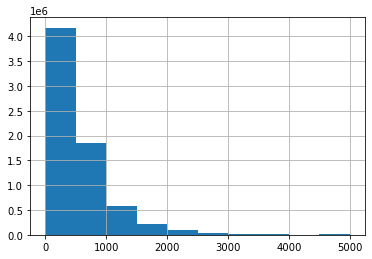

In [ ]:
# Create a histogram of the review description length
review_df['text_length'].hist()

In [ ]:
# Describe the review description length
review_df['text_length'].describe()

count    6.990282e+06
mean     5.677642e+02
std      5.272578e+02
min      1.000000e+00
25%      2.290000e+02
50%      4.060000e+02
75%      7.200000e+02
max      5.000000e+03
Name: text_length, dtype: float64

### Metric 3: Counts for Useful, Cool, Funny Upvotes per Business - Overall df

In [ ]:
# Get the counts of the useful, cool, and funny per business by grouping by business_id
business_counts = review_df.groupby('business_id')[['useful', 'cool', 'funny']].sum().reset_index()
business_counts

,business_id,useful,cool,funny
0,---kPU91CF4Lq2-WlRu9Lw,16.0,13.0,1.0
1,--0iUa4sNDFiZFrAdIWhZQ,25.0,4.0,3.0
2,--30_8IhuyMHbSOcNWd6DQ,7.0,0.0,2.0
3,--7PUidqRWpRSpXebiyxTg,9.0,0.0,2.0
4,--7jw19RH9JKXgFohspgQw,16.0,0.0,0.0
...,...,...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,23.0,17.0,3.0
150342,zztOG2cKm87I6Iw_tleZsQ,1.0,2.0,0.0
150343,zzu6_r3DxBJuXcjnOYVdTw,9.0,3.0,0.0
150344,zzw66H6hVjXQEt0Js3Mo4A,4.0,0.0,0.0


In [ ]:
business_counts.describe()

,useful,cool,funny
count,150346.000000,150346.000000,150346.000000
mean,55.077940,23.183031,15.183264
std,138.692752,79.298980,54.059720
min,0.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000
50%,19.000000,5.000000,4.000000
75%,51.000000,18.000000,13.000000
max,14627.000000,14132.000000,8083.000000


In [ ]:
# Take the difference between the sampled and the original data for the business counts described through converting the descriptions into proportion, where each statistic is divided by the total count and comparing that
business_counts_sampled['useful_prop'] = business_counts_sampled['useful'] / business_counts_sampled['useful'].sum()
business_counts_sampled['cool_prop'] = business_counts_sampled['cool'] / business_counts_sampled['cool'].sum()
business_counts_sampled['funny_prop'] = business_counts_sampled['funny'] / business_counts_sampled['funny'].sum()

business_counts['useful_prop'] = business_counts['useful'] / business_counts['useful'].sum()
business_counts['cool_prop'] = business_counts['cool'] / business_counts['cool'].sum()
business_counts['funny_prop'] = business_counts['funny'] / business_counts['funny'].sum()

# Calculate the difference between the sampled and the original data for the business counts described through converting the descriptions into proportion, where each statistic is divided by the total count and comparing that
business_counts_sampled['useful_diff'] = business_counts_sampled['useful_prop'] - business_counts['useful_prop']
business_counts_sampled['cool_diff'] = business_counts_sampled['cool_prop'] - business_counts['cool_prop']
business_counts_sampled['funny_diff'] = business_counts_sampled['funny_prop'] - business_counts['funny_prop']

business_counts_sampled.describe()

,useful,cool,funny,useful_prop,cool_prop,funny_prop,useful_diff,cool_diff,funny_diff
count,27095.000000,27095.000000,27095.000000,27095.000000,27095.000000,27095.000000,2.709500e+04,2.709500e+04,27095.000000
mean,40.841262,16.871342,11.360472,0.000037,0.000037,0.000037,3.005819e-05,2.999810e-05,0.000030
std,105.508562,52.789151,35.014768,0.000095,0.000115,0.000114,9.750818e-05,1.197471e-04,0.000116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.760964e-03,-4.047977e-03,-0.001602
25%,4.000000,1.000000,0.000000,0.000004,0.000002,0.000000,-2.415241e-07,-8.607146e-07,-0.000001
50%,12.000000,3.000000,2.000000,0.000011,0.000007,0.000006,7.046206e-06,3.801323e-06,0.000004
75%,36.000000,12.000000,9.000000,0.000033,0.000026,0.000029,2.807223e-05,2.187566e-05,0.000025
max,4977.000000,1938.000000,1562.000000,0.004498,0.004240,0.005075,4.472345e-03,4.237782e-03,0.004950


### Metric 4: Counts of Reviews per Business - Overall df

In [ ]:
# These are the counts associated with the businesses to show the distribution
review_df.groupby('business_id').count().sort_values('review_id', ascending=False)[['review_id']].head(10).rename(columns={'review_id': 'count'}) 

,count
business_id,
_ab50qdWOk0DdB6XOrBitw,7673
ac1AeYqs8Z4_e2X5M3if2A,7516
GXFMD0Z4jEVZBCsbPf4CTQ,6160
ytynqOUb3hjKeJfRj5Tshw,5778
oBNrLz4EDhiscSlbOl8uAw,5264
iSRTaT9WngzB8JJ2YKJUig,5254
VQcCL9PiNL_wkGf-uF3fjg,5146
_C7QiQQc47AOEv4PE3Kong,4969
GBTPC53ZrG1ZBY3DT8Mbcw,4661


In [ ]:
# Return the min max quartile counts for the count of reviews per business id
review_count_per_business = review_df.groupby('business_id').count().sort_values('review_id', ascending=False)[['review_id']].describe()
review_count_per_business

,review_id
count,150346.000000
mean,46.494619
std,124.519061
min,5.000000
25%,8.000000
50%,15.000000
75%,38.000000
max,7673.000000


In [ ]:
# Take the proportion of the sampled_reviews_count_per_business and the review_count_per_business with respect to their counts and then take the difference between the proportions
sampled_reviews_count_per_business['review_id_prop'] = sampled_reviews_count_per_business['review_id'] / sampled_reviews_count_per_business['review_id'].sum()
review_count_per_business['review_id_prop'] = review_count_per_business['review_id'] / review_count_per_business['review_id'].sum()

sampled_reviews_count_per_business['review_id_diff'] = sampled_reviews_count_per_business['review_id_prop'] - review_count_per_business['review_id_prop']
sampled_reviews_count_per_business

,review_id,review_id_prop,review_id_diff
count,27095.000000,0.848312,-1.017057e-01
mean,36.907178,0.001156,8.617257e-04
std,98.996153,0.003099,2.312630e-03
min,1.000000,0.000031,-2.855774e-07
25%,6.000000,0.000188,1.373018e-04
50%,11.000000,0.000344,2.496137e-04
75%,30.000000,0.000939,6.991467e-04
max,4661.000000,0.145930,9.744558e-02


In [ ]:
# review_df.to_csv('../data/review.csv', index=False)

In [ ]:
# # Get the average length of the number of friends
# users_sampled_df['friends_count'] = users_sampled_df['friends'].apply(lambda x: len(x.split(',')))
# users_sampled_df['friends_count'].mean()

92.2799

## Display all final dataframes

In [ ]:
# Display the DataFrame
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
# Display the DataFrame
user_df.head()

AttributeError: 'JsonReader' object has no attribute 'head'

In [ ]:
# Display the DataFrame
review_df.head()

AttributeError: 'JsonReader' object has no attribute 'head'